### <div style="text-align: right"> Judith Ardèvol Guillamón _ January 7, 2022 </div>

# <center>  TME - Part 1 - Problem set 2 </center>


### <div style="text-align: justify"> 1. A statistical statement appeared in _The Guardian_ on Friday January 4, 2002: </div>
    
> <div style="text-align: justify"> "When spun on edge 250 times, a Belgian one-euro coin came up heads 140 times and tails 110. ‘It looks very suspicious to me’, said Barry Blight, a statistics lecturer at the London School of Economics. ‘If the coin were unbiased the chance of getting a result as extreme as that would be less than 7%’" </div>

#### <div style="text-align: justify"> $\;\;$ a) Let p be the probability of coming up heads. Consider the null hypothesis that the coin is fair, $H_0 : p = 0.5$. Carefully explain how the 7% figure arises. What term describes this value in the theory of Null-Hypothesis Statistical Testing (NHST)? Does it correspond to a one-sided or two-sided test? </div>

<div style="text-align: justify"> The resulting number of heads, k, found from an experiment in which a coin is spun N times is described by the binomial distribution: </div>

<center> $P(\underline{k}=k)={N \choose k}p^k(1-p)^{N-k}$, </center>

<div style="text-align: justify"> where $p$ is the probability of coming up heads. </div>

<div style="text-align: justify"> In the theory of NHST, we need to define a null hypothesis $H_0$ ($p_0=0.5$ in our case) that has to be tested against some alternative hypothesis $H_A$. We can use the random variable $\underline{k}$ as the statistics for testing $H_0$. We would reject it in favour of $H_A$ when the probability, assuming $H_0$ is true, of having obtained our result, or one that is less in agreement with $H_0$ than it is, is sufficiently small (i.e. smaller than a fixed threshold, known as significance). This probability is called p-value and it corresponds with the 7% figure of the statement. Its general expression is: </div>

<center> $p-value = P("\underline{k}=k_{obs} \ or \ worse"|H_0) $ </center>

<div style="text-align: justify"> However, the specific calculation of the p-value depends on the chosen $H_A$. In our case, the alternative hypothesis can belong to one of the three following types: </div>

* $H_I :$ 1-sided (simple or composite) alternative hypothesis in which $p_I>0.5$
* $H_{II} :$ 1-sided (simple or composite) alternative hypothesis in which $p_{II}<0.5$
* $H_{III} :$ 2-sided composite alternative hypothesis in which $p_{III} \neq 0.5$

<div style="text-align: justify"> Different $H_A$ lead to different concepts of when a result is "worse than the one that has been found" and so, give different p-values. For the previous types of alternative hypothesis, the p-values are comptuted as: </div>

* <div style="text-align: justify"> $H_I :$ Any value of $\underline{k}$ large enough would be more favorable to $H_I$ (having a coin biased towards heads) than to $H_0$ (having a fair coin). Thus, a result is "worse" when $\underline{k}>k_{obs}$. The corresponding p-value is computed according to: </div>
    <center> $p-value(H_I) = P(\underline{k} \geq k_{obs}|H_0)=\sum_{\large{k=k_{obs}}}^{N}P(k)|_{p_0} = \sum_{\large{k=k_{obs}}}^{N}{N \choose k}p_0^k(1-p_0)^{N-k} = \sum_{k=140}^{250}{250 \choose k}0.5^{250}$. </center>
    

* <div style="text-align: justify"> $H_{II} :$ This case is the opposite as the previous one. The largest values of $\underline{k}$ are less favorable to $H_{II}$ than to $H_0$ and thus, they should not lead to rejecting the null hypothesis. On the contrary, small $\underline{k}$ agree more with the alternative hypothesis $H_{II}$ and thus, they are included in the caculus of the p-value. However, we must take into account that $k_{obs}>\hat{k}_0=p_{0}N=125$ in our experimental result. As $\underline{k} \approx \hat{k}_0$ would be more likely if $H_0$ is true that if it is false, and using the symmetry of the experiment, what we need to compute the p-value is: </div>
    <center> $p-value(H_{II}) = P(\underline{k} \leq k_{obs}|H_0)=\sum_{k=0}^{\large{N-k_{obs}}}P(k)|_{p_0} = \sum_{k=0}^{\large{N-k_{obs}}}{N \choose k}p_0^k(1-p_0)^{N-k} = \sum_{k=0}^{110}{250 \choose k}0.5^{250}$. </center>
    

* <div style="text-align: justify"> $H_{III} :$ For an alternative hypothesis complementary to $H_0$, any deviation from $\hat{k}_0$ would be more favorable to $H_{III}$ than to $H_0$. Thus, any result with $|k-\hat{k}_0| \geq |k_{obs}-\hat{k}_0|$ would be equal or "worse" than the observed $k_{obs}$. Thanks to the symmetry of the problem, this corresponds to the both intervals defined for $H_I$ and for $H_{II}$ and so, the p-value in this case can be easily computed by adding the previous ones: </div>
    <center> $p-value(H_{III}) = [p-value(H_I)]+[p-value(H_{II})]$. </center>
    

<div style="text-align: justify"> The required summations of binomial coefficients cannot be done analitically and thus, all the exercise needs to be computed numerically. The calculation of the three possible p-values is made in the next cell. For a visual explanation of how to compute the p-values in each case, see the plot from two code-cells below. </div>

In [1]:
from math import factorial

# DEFINITION OF FUNCTIONS:
def BinomialProb(N,p,k_min,k_max):
    # This function computes the cumulative probability of a binomial distribution defined by the total
    # number of spins N, the probability of getting heads p (any value depending on the hypothesis that
    # is being used). The sum of probabilities is done from k=k_min to k_k_max, bot included (that is
    # to say: k_min<=k<=kmax).
    # To compute the probability of a single value of k, just use k_min=k_max equal to the desired value of k.
    prob = 0. # Initialization of the cumulative probability.
    for k in range(k_min,k_max+1):
        # The first binomial coefficient is computed from the usual definition using factorials (be carefull
        # for too large N or k):
        if k==k_min:
            comb = factorial(N)/(factorial(k)*factorial(N-k))
        # The rest of the coefficients can be recursively computed as follows:
        else:
            comb = comb*((N-k+1)/(k))
        # The cumulative probability is just the addition of the term for each k:
        prob = prob + comb*(p**k)*((1-p)**(N-k))
    return prob

def pValue(N,p,k_obs):
    # This function computes the p-value for an experiment described by a binomial distribution
    # with N total number of spins and probability p of getting heads (the p from the null
    # hypothesis). The p-value is computed for the observed number of heads k_obs.
    # The conditions allow to separate if the summation must be done on the left-hand-side or
    # on the rigth-hand-side of the distribution with respect to its mean.
    # This function uses the previously defined function 'BinomialProb'.
    if k_obs>=(N/2.): # This stands for HI in the case of k_obs=140.
        kMin = k_obs
        kMax = N
    else:  # This stands for HII in the case of k_obs=140 (as explained above).
        kMin = 0
        kMax = k_obs
    p_val = BinomialProb(N,p,kMin,kMax)
    return p_val

# COMMON VARIABLES FOR THE THREE HA:
N = 250 # Total number of spins.
p0 = 0.5 # Probability of coming up heads for the Null hypothesis H0='the coin is fair'.
Nh = 140 # Observed number of heads (k_obs in the previous explanation).

# P-VALUES COMPUTATION:
# Computing the p-values for the three different alternative hypothesis to compare with the given 7% value.
# The most similar one would tell us which one is used in the statement:
pValI = pValue(N,p0,Nh)
print(f'The p-value for the 1-sided test with an alternative hypothesis HI:p>0.5 is {pValI*100:.2f}%.')
pValII = pValue(N,p0,N-Nh)
print(f'The p-value for the 1-sided test with an alternative hypothesis HII:p<0.5 is {pValII*100:.2f}%.')
pValIII = 2*pValue(N,p0,Nh) # By symmetry, the previous p-values are equal and so, pValI+pValII=2*pValI.
print(f'The p-value for the 2-sided test with a composite alternative hypothesis HIII:p\u22600.5 is {pValIII*100:.2f}%.')

The p-value for the 1-sided test with an alternative hypothesis HI:p>0.5 is 3.32%.
The p-value for the 1-sided test with an alternative hypothesis HII:p<0.5 is 3.32%.
The p-value for the 2-sided test with a composite alternative hypothesis HIII:p≠0.5 is 6.64%.


<div style="text-align: justify"> The two first alternative hypotheses leads to p-values much smaller than the desired 7% figure. In conclusion, this quantity should have been computed using the alternative hypothesis $H_{III}$, that is, a 2-sided test. </div>

<div style="text-align: justify"> As said in the statement, the obtained result is very unlikely if the coin is fair because the number of obtained heads is considerably high. In despite of that, a number of heads too low would also be very unlikely. </div>

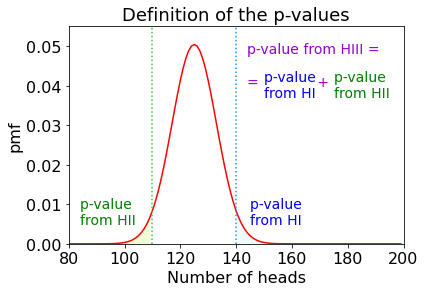

In [2]:
%matplotlib inline
from IPython.utils import io
import scipy.stats as sp
import matplotlib.pyplot as plt

# VARIABLES OF THE EXPERIMENT:
N = 250 # Total number of spins.
p0 = 0.5 # Probability of coming up heads for the Null hypothesis H0='The coin is fair'.
Nh = 140 # Observed number of heads.

fig = plt.subplots()
# Plotting the binomial distribution of the null hypothesis (H0:p0=0.5) for N=250spins:
x = [i for i in range(80,200)] # Range of obtained number of heads.
plt.plot(x, sp.binom.pmf(x, n=N, p=p0),color='red',label='$H_0$')
# Adding the p-values areas or explanation:
    # HI:
x = [i for i in range(Nh,N)]
plt.axvline(Nh,color='dodgerblue',linestyle='dotted')
plt.fill_between(x, 0,sp.binom.pmf(x, n=N, p=p0), where=None, facecolor='paleturquoise', alpha=0.2)
plt.text(145,0.005,'p-value \nfrom HI', color='blue',fontsize='14')
    # HII:
x = [i for i in range(0,N-Nh)]
plt.axvline(N-Nh,color='limegreen',linestyle='dotted')
plt.fill_between(x, 0,sp.binom.pmf(x, n=N, p=p0), where=None, facecolor='greenyellow', alpha=0.2)
plt.text(84,0.005,'p-value \nfrom HII', color='green',fontsize='14')
    # HIII:
plt.text(144,0.04,'p-value from HIII = \n\n=             +', color='darkviolet',fontsize='14')
plt.text(150,0.037,'p-value \nfrom HI', color='blue',fontsize='14')
plt.text(175,0.037,'p-value \nfrom HII', color='green',fontsize='14')
# Setting other general properties of the plot:
plt.xlim([80,200])
plt.ylim([0,0.055])
plt.title('Definition of the p-values',fontsize=18)
plt.xlabel('Number of heads',fontsize=16)
plt.ylabel('pmf',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

#### <div style="text-align: justify"> $\;\;$ b) Would you reject $H_0$ at a significance level of $\alpha = 0.1?$ What about $\alpha' = 0.05$? </div>

<div style="text-align: justify"> From the previous section, we have obtained a p-value of 6.64% for a test with the following specifications: </div>

* Experimental measurements: $\ \ \ N_h=140$ heads obtained after spinning the coin $N=250$ times
* Null hypothesis: $\ \ \ H_0:p_0=0.5$ (the coin is fair)
* Alternative hypothesis:  $\ \ \ H_A=H_{III} :p_A \neq p_0$ (2-sided and composite)

<div style="text-align: justify"> Once we have all this clear, by comparing the p-value and the significance, we can conclude that: </div>

1. We do reject $H_0$ in favour of the aforementioned $H_A$ at a significance level of $\alpha=0.1$ as the obtained experimental result leads to a p-value smaller than the significance: $p-value=6.64\%<\alpha=10\%$.
2. But we do not reject $H_0$ in favour of the same $H_A$ at a significance level of $\alpha'=0.05$ as in this second case the p-value is larger than this quantity: $p-value=6.64\%>\alpha'=5\%$.

<div style="text-align: justify"> This result allows to prove that whether rejecting or not $H_0$ does not only depend on the experimental measurements, but also in the specific properties of the applied test: $H_0$, $H_A$ and $\alpha$. The former is defined according to the hypothesis we want to deny, while the others define the rejection region. </div>

<div style="text-align: justify"> To use the same experimental result and the same hypotheses (so, having the same p-value), would lead to reject or not the null hypothesis depending on the significance. For a too small significance, it will be more likely for any p-value to be higher than it. So, it will be difficult to reject the null hypothesis even if it is not very accurate. The derived test would have high confidence level, but small power as a type II error would be quite likely. On the other hand, using a too large significance will lead to easily reject the null hypothesis, increasing the probability of a type I error. </div>

#### <div style="text-align: justify"> $\;\;$ c) How many heads would you need to have observed out of 250 spins to reject at a significance of $\alpha = 0.01$? </div>

<div style="text-align: justify"> To reject $H_0$ at a significance of $\alpha=0.01=1\%$, we would need a p-value equal or lower than this quantity. To know how many heads would we need to do so, we sweep different values of k. We then compute the corresponding p-values and compare them with the required significance. The minimum number of heads needed to reject $H_0$ if $\alpha=0.01$ is the one whose p-value falls below it for the first time if we are scanning the range of k upwards (p-value decreases with increasing k for $k>\hat{k}_0$). We use the same alternative hypothesis that has been defined in the previous section. </div>

<div style="text-align: justify"> As the p-value of $k_{obs}=140$ is $0.064>\alpha=0.01$, we sweep all the possibilities from it until N. By doing this, we found that we need at least 146 heads out of 250 spins to reject $H_0$ fixing a significance of $\alpha=0.01=1\%$. </div>

In [3]:
# CONSTANT VARIABLES FOR THIS SECTION:
N = 250 # Total number of spins.
p0 = 0.5 # Probability of coming up heads for the Null hypothesis H0='the coin is fair'.
signif = 0.01 # Desired significance to reach.
achieved = False # Initialization of the variable containing whether minPower has been reached or not.
# Range of observed number of heads to use in the loop:
kLow = 140
kHigh = N

# SCAN OF THE RANGE OF NUMBER OF HEADS:
for k in range (kLow,kHigh+1):
    # For each value of k, the p-value is computed and compared with the sinificance threshold:
    pVal = 2*pValue(N,p0,k)
    # We stop the loop when we reach the desired significance:
    if pVal<=signif:
        mink = k
        achieved = True
        print(f'The minimum number of heads required to obtain a significance of {signif*100:.1f}% \
is {mink}, which leads to a p-value of {pVal*100:.2f}%.')
        break
    # If the desired significance has not been achieved after the whole loop, the user is advertised:
    if (k==kHigh)and(achieved==False):
        print(f'The minimum p-value achieved with k between {kLow} and {kHigh} is {pVal*100:.2f}%. Thus, it is \
needed to sweep the observed number of heads using a larger interval in order to achieve the required \
significance of {signif*100:.1f}%.')

The minimum number of heads required to obtain a significance of 1.0% is 146, which leads to a p-value of 0.94%.


#### <div style="text-align: justify"> $\;\;$ d) (i) Fix significance at $\alpha = 0.05$. Compute and compare the power of the test for the alternative hypotheses $H_1 : p = 0.55$ and $H_2 : p = 0.6$. (ii) Sketch the pmf of each hypothesis and use it to explain the change in power observed in part (i). </div>

<div style="text-align: justify"> The power of a statistical test is defined as the probability of obtaining a true negative. In other words, it is the probability of rejecting $H_0$ given that the alternative hypothesis is true. The null hypothesis is rejected when the observed number of heads (k) belongs to the rejection region. Thus, </div>

<center> $power = P(rejecting \ H_0 | H_A) = P(k \in rejection \ region | H_A)$. </center>

<div style="text-align: justify"> By construction, any value of k inside the rejection region leads to a p-value lower than the significance that is being considered. In this second case, both alternative hypotheses ($H_1:p_1=0.55$ and $H_2:p_2=0.6$) are simple, 1-sided and have a probability of obtaining heads $p_i>p_0=0.5$. Because of this, the p-value is of the type of the hypotesis $H_I$ described in the first section of this exercice. So, the rejection region will be limited by a certain lower boundary and the total number of spins, N. This lower boundary is found as the value of k for which the p-value is the maximum one being smaller than the significance. </div>
    
<div style="text-align: justify"> We consider such a rejection region because obtaining a too small number of heads will be more favorable for the null hypothesis than for any of the given alternatives ($H_1$ or $H_2$). In the case of an alternative hypothesis with $p<0.5$, the rejection region would be between 0 and a given upper limit constructed analogously to the previous lower boundary. The combination of both described intervals would be the rejection region for a 2-sided alternative hypothesis such as $p\neq p_0=0.5$, the one used in the previous sections. </div>

In [4]:
def rejection(N,p0=0.5,signif=0.05):
    # This function computes the rejection region for a binomial experiment spinning a coin N times.
    # It uses a null hypothesis defined by the probability of getting heads equal to p0. The rejection
    # region is computed using a significance equal to signif and assuming a 1-sided alternative hypothesis
    # (simple or composite) for which p>0.5. This is the case for H1 and H2 we are asked for. However, this
    # could be generalized by adding an argument describing the three possibilities for the alternative
    # hypothesis (1-sided p>p0, 1-sided p<p0 or 2-sided p different from p0) and searching the rejection
    # region in the same way, but considering the p-value as has been computed in the first section of this
    # exercise. For the last case, the outcome migth be adapted to consider the two ranges of k in which
    # the rejection region is split into.
    # The function returns a list containing the lower and the upper boundaries of the rejection region in the
    # way that H0 is rejected whenever the observed number of heads k verifies: k_reject[0] <= k <= k_reject[1].
    # This function uses the previously defined function 'BinomialProb'.
    for k in range(int(N/2.),N):
        pVal = pValue(N,p0,k)
        #print('k =',k,'    p-value =',pVal)
        if pVal<=signif:
            print(f'For H0:p={p0} assuming a 1-sided alternative hypothesis compatible with HA:p>0.5, the \
rejection region is defined by k\u2208[{k},{N}]. The lower limit has p-value of {pVal:.3f}, which is \
lower than the desired significance (\u03B1={signif}).')
            break
    k_reject = [k,N]
    return k_reject

# COMMON VARIABLES:
N = 250 # Total number of spins.
p0 = 0.5 # Probability of coming up heads for the Null hypothesis H0='The coin is fair'.
signif = 0.05 # Desired significance of the test.
k_reject = rejection(N,p0,signif) # Boundaries of the rejection region. It is equal for both H1 and H2.

# H1 CASE:
p_A1 = 0.55
power1 = BinomialProb(N,p_A1,k_reject[0],k_reject[1])
print(f'The power of the test for the alternative hypothesis H1:p1=0.55 is {power1*100:.2f}%.')

# H2 CASE:
p_A2 = 0.6
power2 = BinomialProb(N,p_A2,k_reject[0],k_reject[1])
print(f'The power of the test for the alternative hypothesis H2:p1=0.6 is {power2*100:.2f}%.')

For H0:p=0.5 assuming a 1-sided alternative hypothesis compatible with HA:p>0.5, the rejection region is defined by k∈[139,250]. The lower limit has p-value of 0.044, which is lower than the desired significance (α=0.05).
The power of the test for the alternative hypothesis H1:p1=0.55 is 45.03%.
The power of the test for the alternative hypothesis H2:p1=0.6 is 93.06%.


<div style="text-align: justify"> Considering the aforementioned defition of a 1-sided rejection region, we obtain that $H_0$ is rejected when the observed number of heads is between 139 and N=250. From this, we derive a power of around 45% for the alternative hypothesis $H_1$ and 93% for $H_2$. As we have already said when analysing the effect of changing the significance (section b), the result of the test depends on the used alternative hypothesis. </div>

<div style="text-align: justify"> The plot from the following cell represents the pmf of the hypotheses $H_0$, $H_1$ and $H_2$, as well as the computed rejection region (orange-shadowed). To facilitate the visualization, the pmf's are shown as continuous functions although k is discrete. The left panel focuses on the $H_1$ hypothesis while the rigth one is focused on the $H_2$ hypothesis. Each panel shows the corresponding pmf compared with the one of the null hypothesis. Furthermore, the pmf of the other alternative hypothesis is also plotted (more transparently) to facilitate the comparison between both panels. </div>

<div style="text-align: justify"> On the one hand, the plot clearly shows that the pmf shifts with the probability p. This displacement is expected as the mean of a binomial distribution is $\mu=pN$. The expression of the variance of this distribution, $\sigma^2=p(1-p)N$, indicates that the pmf should also become narrower when p separates from 0.5. However, this is not easy to see in the plot due to the similitude between the three values of p. For the same reason, the expected growth of the maximum value of the distribution that is derived from the normalization is also difficult to observe. </div>

<div style="text-align: justify"> On the other hand, we can graphically assimilate the area of the rejection region below a given pmf with the power of the test using the corresponding alternative hypothesis (grey-shadowed regions). By doing this, it is easy to qualitatively compare the power for each alternative hypothesis. It is clear that $H_2$ has more power as most of its pmf falls inside the rejection region. So, it would be likely to have a true negative (rejecting $H_0$) if the coin really had $p=p_2$. Conversely, $H_1$ has lower power because only a small part of its non-zero pmf coincide with the rejection region. In other words, it would not be very likely to find an experimental result that allows to reject $H_0$ in favour of $H_1$ even if $H_1$ was true. This is due to the fact that $H_0$ and $H_1$ are very similar and it is more difficult to distinguish them than to discriminate more different hypotheses (like $H_0$ and $H_2$). To conclude, higher $|p_{alternative}-p_0|$ leads to more power using the current experiment. </div>

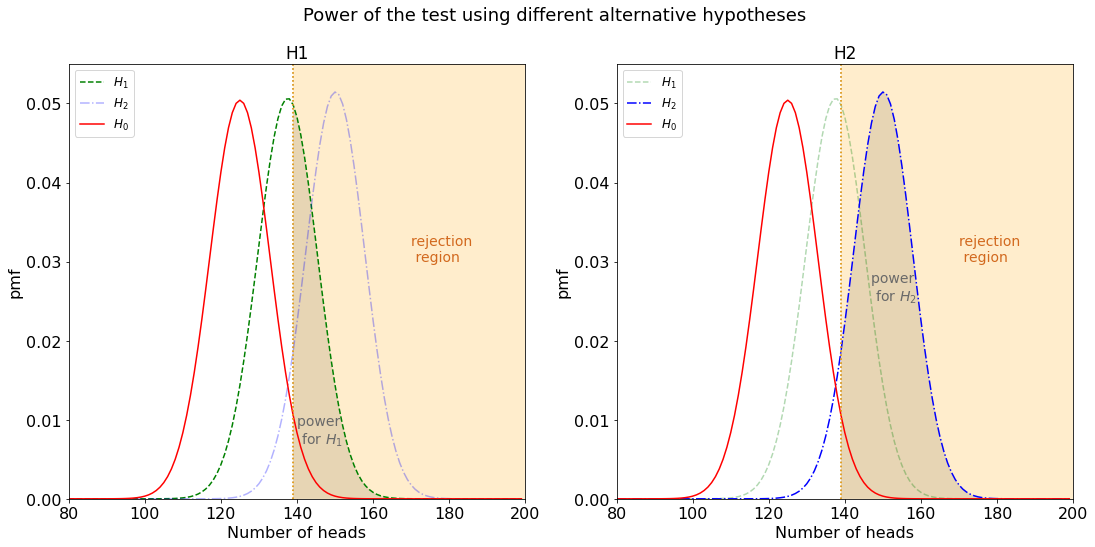

In [5]:
x = [i for i in range(80,200)] # Range of obtained number of heads.
N = 250 # Total number of spins.
p0 = 0.5 # Null hypothesis probability of obtaining heads.
p1 = 0.55 # H1 alternative hypothesis probability of obtaining heads.
p2 = 0.6 # H1 alternative hypothesis probability of obtaining heads.
signif = 0.05 # Required significance.
# Computing the rejection region for this test without printing the result.
with io.capture_output():
    k_reject = rejection(N,p0,signif)
    x_reject = [i for i in range(k_reject[0],k_reject[1]+1)]

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,8 )) # Initialization of the figure.
# Adding H1 and H2 pmf in the left panel:
ax1.plot(x, sp.binom.pmf(x, n=N, p=p1),color='green',linestyle='dashed',label='$H_1$')
ax1.plot(x, sp.binom.pmf(x, n=N, p=p2),color='blue',linestyle='dashdot',label='$H_2$',alpha=0.3)
# Adding the graphical interpretation of the power of the test for H1 in the left panel:
ax1.axvline(k_reject[0],color='grey',linestyle='dotted')
ax1.fill_between(x_reject, 0,sp.binom.pmf(x_reject, n=N, p=p1), where=None, facecolor='silver', alpha=0.45)
ax1.text(140,0.007,'power \n for $H_1$', color='dimgray',fontsize='14')
# Adding H1 and H2 pmf in the rigth panel:
ax2.plot(x, sp.binom.pmf(x, n=N, p=p1),color='green',linestyle='dashed',label='$H_1$',alpha=0.3)
ax2.plot(x, sp.binom.pmf(x, n=N, p=p2),color='blue',linestyle='dashdot',label='$H_2$')
# Adding the graphical interpretation of the power of the test for H2 in the rigth panel:
ax2.axvline(k_reject[0],color='grey',linestyle='dotted')
ax2.fill_between(x_reject, 0,sp.binom.pmf(x_reject, n=N, p=p2), where=None, facecolor='silver', alpha=0.45)
ax2.text(147,0.025,'power \n for $H_2$', color='dimgray',fontsize='14')
# Common properties on both subplots:
for ax in (ax1,ax2):
    # Plotting the pmf of the null hypothesis:
    ax.plot(x, sp.binom.pmf(x, n=N, p=p0),color='red',label='$H_0$')
    # Adding the rejection region:
    ax.axvline(k_reject[0],color='orange',linestyle='dotted')
    ax.fill_between(k_reject, 0,0.055, where=None, facecolor='orange', alpha=0.2)
    ax.text(170,0.03,'rejection \n region', color='chocolate',fontsize='14')
    # Setting other general properties of the plot:
    ax.set_xlim([80,200])
    ax.set_ylim([0,0.055])
    ax.set_xlabel('Number of heads',fontsize=16)
    ax.set_ylabel('pmf',fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.legend(prop={'size': 12},loc='upper left')
# Titles of the plot and the subplots:
plt.suptitle('Power of the test using different alternative hypotheses',fontsize=18)
ax1.set_title('H1',fontsize=17)
ax2.set_title('H2',fontsize=17)
plt.show()

#### <div style="text-align: justify"> $\;\;$ e) (i) Again fix $\alpha = 0.05$. What is the smallest number of spins necessary for the test to have a power of 0.9 when $H_A = H_1$? (ii) As in part (d), draw sketches and explain how they illustrate the change in power. </div>

<div style="text-align: justify"> From the previous section of the exercise, we know how to compute the power of a test for a given alternative hypotesis (we will focus on $H_1$ in this case). This value depends on the total number of spins, N, as it determines the rejection region. Thus, if we compute the power of the test for several increasing N, we could find the number for which the power gets above 90% for the first time. This $N^*$ is the minimum number of spins necessary to have a power of 90%. Any $N>N^*$ will lead to higher power (in the next plot, we will prove that the power increases with N). </div>
<div style="text-align: justify"> The following code cell implements the same steps as before to compute the power for each N (i.e. first computing the rejection region and then computing the power as the probability of k being inside it for $p_1=0.55$). It sweeps values of the number of spins between the original one (250) and 1000, but the lower limit can be increased to reduce the computation time. We can also change the significance at which we are working and also the power we want to achieve. </div>
<div style="text-align: justify"> From the next cell, we obtain that the minimum number of spins required to obtain a power of 0.9 for a $H_0:p_0=0.5$ and $H_A=H_1:p_1=0.55$ at a significance of 0.05 is 886. </div>

In [6]:
# VARIABLES FOR THIS SECTION:
# Limits for the loop in number of spins of the coin:
Nlow = 250
Nhigh = 1000
p0 = 0.5 # Probability of obtaining heads for the null hypothesis.
p1 = 0.55 # Probability of obtaining heads for the alternative hypothesis H1.
signif = 0.05 # Significance to define the rejection region.
minPower = 0.9 # Desired power to achieve.
achieved = False # Initialization of the variable containing whether minPower has been reached or not.

# SCAN OF THE RANGE OF NUMBER OF SPINS:
for n in range(Nlow,Nhigh+1):
    # For each value of the number of spins we compute the rejection region as before:
    with io.capture_output(): # Avoid printing the rejection region result for all n.
        k_reject = rejection(n,p0,signif)
    # Knowing the rejection region, we can compute the power for the H1 alternative hypothesis:
    power = BinomialProb(n,p1,k_reject[0],k_reject[1])
    # We stop the loop when we reach the desired power:
    if power>=minPower:
        minN = n
        achieved = True
        print(f'The minimum number of spins required to obtain a power of {minPower} using p = {p1} as alternative \
hypothesis is {minN}, which leads to a power of {power:.2f}.')
        break
    # If the desired power has not been achieved after the whole loop, the user is advertised:
    if (n==Nhigh)and(achieved==False):
        print(f'The maximum power achieved with N between {Nlow} and {Nhigh} is {power*100:.2f}%. So, it is \
needed to sweep the number of spins using a larger interval in order to achieve the required power of \
{minPower*100:.1f}%.')

The minimum number of spins required to obtain a power of 0.9 using p = 0.55 as alternative hypothesis is 866, which leads to a power of 0.90.


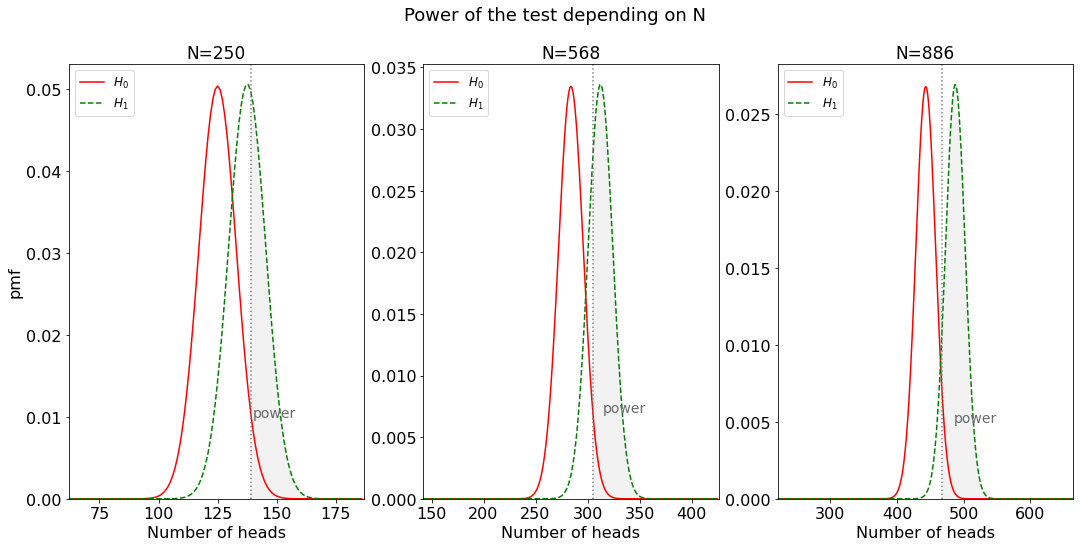

In [7]:
p0 = 0.5 # Null hypothesis probability of obtaining heads.
p1 = 0.55 # H1 alternative hypothesis probability of obtaining heads.
signif = 0.05 # Required significance.


# Plotting the pmf of the H0 and H1 hypotheses and the area of the power to compare it for different N:
fig, (ax1,ax2,ax3)= plt.subplots(1,3,figsize=(18,8 ))

# Plot for initial N:
Nini=250
# each subplot is centered in the H0 mean and spread over 1 variance at both sides:
x = [i for i in range(int(Nini*p0-Nini*p0*(1-p0)),int(Nini*p0+Nini*p0*(1-p0)))]
# the rejecting region must be computed for each N:
with io.capture_output():
    k_reject = rejection(Nini,p0,signif)
    x_reject = [i for i in range(k_reject[0],k_reject[1]+1)]
# all of them have the same specifications as the plot in the previous section:
ax1.plot(x, sp.binom.pmf(x, n=Nini, p=p0),color='red',label='$H_0$')
ax1.plot(x, sp.binom.pmf(x, n=Nini, p=p1),color='green',linestyle='dashed',label='$H_1$')
ax1.axvline(k_reject[0],color='grey',linestyle='dotted')
ax1.fill_between(x_reject, 0,sp.binom.pmf(x_reject, n=Nini, p=p1), where=None, facecolor='silver', alpha=0.2)
ax1.text(140,0.01,'power', color='dimgray',fontsize='14')
ax1.set_xlim([int(Nini*p0-Nini*p0*(1-p0)),int(Nini*p0+Nini*p0*(1-p0))])
ax1.set_title('N=250',fontsize=17)

# Plot for the final N (the already computed minimum required to have a power of 0.9):
Nfin=886
# each subplot is centered in the H0 mean and spread over 1 variance at both sides:
x = [i for i in range(int(Nfin*p0-Nfin*p0*(1-p0)),int(Nfin*p0+Nfin*p0*(1-p0)))]
# the rejecting region must be computed for each N:
with io.capture_output():
    k_reject = rejection(Nfin,p0,signif)
    x_reject = [i for i in range(k_reject[0],k_reject[1]+1)]
# all of them have the same specifications as the plot in the previous section:
ax3.plot(x, sp.binom.pmf(x, n=Nfin, p=p0),color='red',label='$H_0$')
ax3.plot(x, sp.binom.pmf(x, n=Nfin, p=p1),color='green',linestyle='dashed',label='$H_1$')
ax3.axvline(k_reject[0],color='grey',linestyle='dotted')
ax3.fill_between(x_reject, 0,sp.binom.pmf(x_reject, n=Nfin, p=p1), where=None, facecolor='silver', alpha=0.2)
ax3.text(485,0.005,'power', color='dimgray',fontsize='14')
ax3.set_xlim([int(Nfin*p0-Nfin*p0*(1-p0)),int(Nfin*p0+Nfin*p0*(1-p0))])
ax3.set_title('N=886',fontsize=17)

# Plot for an intermediate N (e.g. the mean between the initial and the final):
Nint=568
# each subplot is centered in the H0 mean and spread over 1 variance at both sides:
x = [i for i in range(int(Nint*p0-Nint*p0*(1-p0)),int(Nint*p0+Nint*p0*(1-p0)))]
# the rejecting region must be computed for each N:
with io.capture_output():
    k_reject = rejection(Nint,p0,signif)
    x_reject = [i for i in range(k_reject[0],k_reject[1]+1)]
# all of them have the same specifications as the plot in the previous section:
ax2.plot(x, sp.binom.pmf(x, n=Nint, p=p0),color='red',label='$H_0$')
ax2.plot(x, sp.binom.pmf(x, n=Nint, p=p1),color='green',linestyle='dashed',label='$H_1$')
ax2.axvline(k_reject[0],color='grey',linestyle='dotted')
ax2.fill_between(x_reject, 0,sp.binom.pmf(x_reject, n=Nint, p=p1), where=None, facecolor='silver', alpha=0.2)
ax2.text(315,0.007,'power', color='dimgray',fontsize='14')
ax2.set_xlim([int(Nint*p0-Nint*p0*(1-p0)),int(Nint*p0+Nint*p0*(1-p0))])
ax2.set_title('N=568',fontsize=17)

# Common properties:
plt.suptitle('Power of the test depending on N',fontsize=18)
ax1.set_ylabel('pmf',fontsize=16)
for ax in (ax1,ax2,ax3):
    ax.set_xlabel('Number of heads',fontsize=16)
    ax.set_ylim(bottom=0.)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.legend(prop={'size': 12},loc='upper left')
plt.show()

<div style="text-align: justify"> The previous plot show the variation of the power of the test for the alternative hypothesis $H_1$ with the total number of spins. Each panel has different ranges of the axes to visualize both pmf's. In all the cases, the pmf's of the null hypothesis and the alternative hypothesis are plotted, together with the graphical interpretation of the power defined in the previous section of this exercise. Several conclusions can be derived from this plot.</div>

<div style="text-align: justify"> The pmf shifts to the right and gets broader with increasing N as its mean, $\mu=pN$, and its variance, $\sigma^2=p(1-p)N$, grow. Obviously, the rejection region also shifts towards higher values of the number of heads. However, the boundary of the rejection region moves less than the entire distributions and so, the overlaping between them increases. Consequently, the derived power grows with N. Once the power reaches a specific value (e.g. 90%), it will always improve when increasing the number of spins (maintaining unmodified the rest of the experiment). </div>

#### <div style="text-align: justify"> $\;\;$ f) Let $H_A = H_1$. If we have only two hypotheses, $H_0$ and $H_A$ and a flat prior $P(H_0) = P(H_A)=0.5$, what is the posterior probability of $H_A$ given the data? </div>

<div style="text-align: justify"> We are asked about the probability of $H_A=H_1$ given the data ($N=250$, $k_{obs}=140$). Using the Bayes' theorem and the law of total probability, it can be expressed in the following way: </div>

<center> $P(H_1|data) = \large{\frac{P(H_1 \cap data)}{P(data)} = \frac{P(data|H_1)P(H_1)}{P(data)} = \frac{P(data|H_1)P(H_1)}{P(data|H_1)P(H_1)+P(data|H_0)P(H_0)}}$ </center>

<div style="text-align: justify"> From the exercise, we know that $P(H_0) = P(H_1)=0.5$, but we still need to compute the probability of the data given each hypothesis. Considering that $data$ refers to $N=250$ and $k_{obs}=140$, and the fact that the hypotheses are $H_i:p=p_i$ with $p_0=0.5$ and $p_1=0.55$: </div>

<center> $P(data|H_i) = P(\underline{k}=k_{obs}|p=p_i) = {N \choose k_{\large{obs}}}{p_i}^{k_{\large{obs}}}(1-p_i)^{N-k_{\large{obs}}} $ </center>

<div style="text-align: justify"> The numerical result derived from this calculation is printed below the following code: </div>

In [8]:
N = 250 # Total number of spins.
Nh = 140 # Observed number of heads, k_obs.
p0 = 0.5 # Probability of getting heads for H0.
p1 = 0.55 # Probability of getting heads for H1.

# Flat prior with the probabilities of each of the hypothesis:
Prob_0 = 0.5
Prob_1 = 0.5

# Probabilities derived from the binomial distribution with the data and the corresponding p_i:
Prob_data0 = BinomialProb(N,p0,Nh,Nh)
Prob_data1 = BinomialProb(N,p1,Nh,Nh)

# Posterior of H1 given the data:
Prob_1data = (Prob_data1*Prob_1)/(Prob_data1*Prob_1+Prob_data0*Prob_0)
print(f'The posterior probability of this alternative hypothesis given the obtained data is \
P(p={p1})={Prob_1data:.3f}={Prob_1data*100:.1f}%.')

The posterior probability of this alternative hypothesis given the obtained data is P(p=0.55)=0.852=85.2%.


#### <div style="text-align: justify"> $\;\;$ g) What probability would you personally place on the coin being biased toward heads? Why? There is no right answer for this. </div>

<div style="text-align: justify"> Using the same methodology as in the previous section, we can compute the total probability of a set of alternative hypotheses $H_A$ where the coin is biased toward heads. To do so, we define a step in the probability p ($\delta p$) between successive hypotheses. We describe all the possibilities for our coin with three groups of hypothesis: </div>

* <div style="text-align: justify"> $H_A:$ set of simple alternative hypotheses where the coin is biased toward heads. Each $H_A[i]$ is described as having a coin with ${p_A}[i]=0.5+i·\delta p$. </div>
* <div style="text-align: justify"> $H_B:$ set of simple alternative hypotheses where the coin is biased toward tails. Each $H_B[i]$ corresponds to a coin with ${p_B}[i]=0.5-i·\delta p$. </div>
* <div style="text-align: justify"> $H_0:$ the same null hypothesis as before, the coin is fair ($p_0=0.5$). </div>

<div style="text-align: justify"> Assuming a flat prior for all the hypotheses, we can compute the posterior probability of the coin being biased towards heads using the Bayes' theorem and the law of total probability. However, in this case, we need to take into account the probabilities of all the aforementioned hypotheses, which are considered as being independent. The resulting probability of having a coin biased towards heads is:
    
<center> $P({H_A}|data) = P\big{(}\bigcup{H_A[i]}|data\big{)} = \sum{P(H_A[i]|data)} =$ </center>
<center> $= \large{\sum{\frac{P(H_A[i] \cap data)}{P(data)}}} = \sum{\frac{P(data|H_A[i])P(H_A[i])}{P(data)}} = \frac{\sum{P(data|H_A[i])P(H_A[i])}}{\sum{[P(data|H_A[i])P(H_A[i])+P(data|H_B[i])P(H_B[i])+P(data|H_0)P(H_0)}]}$ </center>

<div style="text-align: justify"> The ideal case would be using $\delta p \to 0$ in order to really include all the possibilities and have $H_A:p_A>0.5$ and $H_B:p_B<0.5$ instead of a discrete approximation. As this is not feasible in our case, we will analyse several decreasing values for this increment until the posterior probabilities $P({H_A}|data)$, $P({H_B}|data)$ and $P({H_0}|data)$ converge to approximately constant values (for small enough $\delta p$). This methodology is applied in the following cell of code, which also shows the evolution of these posteriors with the value of $\delta p$. </div>

<div style="text-align: justify"> Due to lack of computational memory, it has not been possible to use small enough $\delta p$ (or equivalently, a large enough number of alternative hypotheses). Nevertheless, it seems clear that $P({H_A}|data)$ starts to converge around 97.1%. This is the estimation of the probability of the coin being biased toward heads (having $p_A>0.5$). </div>

The posterior probability of the set of alternative hypotheses biased toward heads equally separated by an increment in probability of 0.25 given the obtained data is P(dp=0.25)=3.463e-09=0.0%.

The posterior probability of the set of alternative hypotheses biased toward heads equally separated by an increment in probability of 0.05 given the obtained data is P(dp=0.05)=0.8936=89.4%.

The posterior probability of the set of alternative hypotheses biased toward heads equally separated by an increment in probability of 0.025 given the obtained data is P(dp=0.025)=0.9382=93.8%.

The posterior probability of the set of alternative hypotheses biased toward heads equally separated by an increment in probability of 0.01 given the obtained data is P(dp=0.01)=0.9594=95.9%.

The posterior probability of the set of alternative hypotheses biased toward heads equally separated by an increment in probability of 0.005 given the obtained data is P(dp=0.005)=0.9655=96.5%.

The posterior probability of 

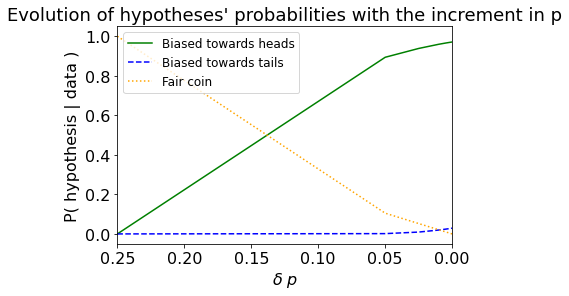

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt


# Initialization of a plot containing the evolution of the resulting probabilities:
fig = plt.subplots()
dp = []
heads = []
tails = []
fair = []


N = 250 # Total number of spins.
Nh = 140 # Observed number of heads, k_obs.
p0 = 0.5  # Probability of getting heads for H0(fair coin).

# Instead of over dp, the loop is performed over the number of intervals for HA (and HB). The variable
# i of the previous explanation goes from 1 to {slices-1}. By increasing the number of slices, dp
# decreases and may lead to a better convergence.
for slices in (2,10,20,50,100,200,500,1000,10**5,10**6):
    # Probabilities of getting heads for alternative hypotheses:
    delta_p = (1.-0.5)/slices # Increment dp.
    pA_i = [p0+j*delta_p for j in range(1,slices)] # Probabilities for a coin biased toward heads (0.5<p<1).
    pB_i = [p0-j*delta_p for j in range(1,slices)] # Probabilities for a coin biased toward tails (0<p<0.5).
    
    # Assuming a flat prior for all the hypotheses (there are 2*{slices-1} HA plus one H0, i.e. 2*slices-1):
    prob1 = 1./(2.*slices-1.) # Probability of a single hypothesis (H0, each HA and each HB).
    Prob_0 = prob1 # Probability of the null hypothesis.
    
    # Probabilities derived from the binomial distribution given the data and the corresponding probability
    # of coming up heads:
    Prob_data0 = BinomialProb(N,p0,Nh,Nh) # p0 (null hypothesis).
    Prob_dataA_i = [BinomialProb(N,pA,Nh,Nh) for pA in pA_i] # Each pA (alternative: toward heads).
    Prob_dataB_i = [BinomialProb(N,pB,Nh,Nh) for pB in pB_i] # Each pB (alternative: toward tails).
        
    # Total probability of the intersection between the data and each alternative hypothesis:
    Prob_AnData = 0. # For coins biased towards heads.
    Prob_BnData = 0. # For coins biased towards tails.
    for i in range(0,(slices-1)):
            Prob_AnData = Prob_AnData+Prob_dataA_i[i]*prob1
            Prob_BnData = Prob_BnData+Prob_dataB_i[i]*prob1

    # Posterior of the two main alternative hypotheses and of the null hypothesis given the data:
    Prob_Adata = Prob_AnData/(Prob_AnData+Prob_BnData+Prob_data0*Prob_0)
    Prob_Bdata = Prob_BnData/(Prob_AnData+Prob_BnData+Prob_data0*Prob_0)
    Prob_0data = Prob_data0*Prob_0/(Prob_AnData+Prob_BnData+Prob_data0*Prob_0)    
    
    print(f'The posterior probability of the set of alternative hypotheses biased toward heads equally \
separated by an increment in probability of {delta_p} given the obtained data is \
P(dp={delta_p})={Prob_Adata:.4}={Prob_Adata*100:.1f}%.\n')
    
    # Saving the results to plot the evolution:
    dp.append(delta_p)
    heads.append(Prob_Adata)
    tails.append(Prob_Bdata)
    fair.append(Prob_0data)


# Including the resulting evolution to the plot to see the convergence:
plt.plot(dp, heads, color='green',label='Biased towards heads')
plt.plot(dp, tails, color='blue',label='Biased towards tails', linestyle='dashed')
plt.plot(dp, fair, color='orange',label='Fair coin',linestyle='dotted')
# Setting other general properties of the plot:
plt.xlim([0.25,0.])
plt.title("Evolution of hypotheses' probabilities with the increment in p",fontsize=18)
plt.xlabel('$\delta \ p$',fontsize=16)
plt.ylabel('P( hypothesis | data )',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(prop={'size': 12})
plt.show()

### <div style="text-align: justify"> 2. In a experiment on the accuracy of polygraph tests, 140 people were instructed to tell the truth and 140 people were instructed to lie. Testers use a polygraph to guess whether or not each person is lying. By analogy, let’s say $H_0$ corresponds to the testee telling the truth and $H_A$ corresponds to the testee lying. </div>
#### <div style="text-align: justify"> $\;\;$ a) Describe the meaning of type I and type II errors in this context, and estimate their probabilities based on the following table: </div>

|                      | Testee is truthful | Testee is lying|
|:---:|:---:|:---:|
| Tester thinks testee is truthful |     131      |    15    |
|  Tester thinks testee is lying   |      9       |    125   |

<div style="text-align: justify"> In a general case, a type I error is defined as falsely rejecting the null hypothesis $H_0$. That is to say, rejecting $H_0$ when it is true (it is a false negative). On the other hand, a type II error is non-rejecting $H_0$ when the alternative hypothesis $H_A$ reflects better the reality (it is a false positive). In the described experiment, they are as follows: </div>

<div style="text-align: justify">  First, a type I error would be to obtain from the polygraph that the testee is lying when he/she is telling the truth (the tester would unjustly accuse the testee). Its probability can be estimated by dividing the number of untrusted truthful testees by the total number of people of the sample: $P(type \ I \ error) = 9/280 \approx 3.21\%$. </div>

<div style="text-align: justify"> Second, in this context a type II error would be thinking that the testee is truthful when he/she is lying (the tester would trust in a liar). The probability can be estimated as the number of lying testees divided by the size of the global sample: $P(type \ II \ error) = 15/280 \approx 5.36\%$. </div>

<div style="text-align: justify">  </div>

#### <div style="text-align: justify"> $\;\;$ b) In NHST, which  relationships exist between the terms significance level, power, type I error, and type II error? </div>

<div style="text-align: justify"> In NHST, the probability of a type I error is known as significance level ($\alpha$): $P(type \ I \ error) = P(rejecting \ H_0 | H_0) \equiv \alpha$. It is the complementary of the confidence level (which is equal to $1-\alpha$). A test with higher significance allows more type I errors (they are more likely) and so, leads to less confidence in the results of the test. </div>

<div style="text-align: justify"> The power of a test is defined as the probability of having a true negative (i.e. rejecting $H_0$ when it is false). Thus, the probability of a type II error is related with it according to $P(type \ II \ error) = P(non-rejecting \ H_0 | H_A) = 1-P(rejecting \ H_0 | H_A) \equiv 1 - power$. So, the power and the probability of a type II error are complementary quantities. A test with more power is more accurate as it has more probability of rejecting $H_0$ when $H_A$ is true. </div>

### <div style="text-align: justify"> 3. We perform a t-test for the null hypothesis $H_0 : \mu = 10$ at significance level $\alpha = 0.05$ by means of a dataset consisting of n = 16 elements with sample mean 11 and sample variance 4. </div>
#### <div style="text-align: justify"> $\;\;$ a) Should we reject the null hypothesis in favor of $H_1 : \mu = 10$? $\;\;$ b) What if we test against $H_2 : \mu >10$? </div>

<div style="text-align: justify"> To perform a t-test we need to assume that the n=16 elements of our dataset are normally distributed and that they are independent. Once we have said this, let us continue by defining the test statistics for a one-sample t-test: $\underline{t} \equiv \frac{\underline{\hat{x}}-\mu}{\sqrt{\underline{\hat{s^2}}/n}}$. For our dataset and using the mean for the null hypothesis $\mu=\mu_0=10$, it is equal to $t_{obs} = \frac{11-10}{\sqrt{4/16}} = 2$ (which is positive). </div>

<div style="text-align: justify"> If the null hypothesis is true, the t-statistics, $\underline{t}$, follows a $t(\nu)$ distribution with $\nu=n-1$ degrees of freedom ($\nu=15$ in our case). So, it is described by the pdf: </div>

<center> $P_{\large{t(\nu)}}\big{(}\underline{t}=t\big{)} = \large{\frac{\Gamma\big{(}\frac{\nu+1}{2}\big{)}}{\sqrt{\nu\pi} \ \Gamma(\nu/2)}}\bigg{(}\small{1}+\large{\frac{t^2}{\nu}}\bigg{)}^{\large{\frac{-(\nu+1)}{2}}}$ </center>
    
<div style="text-align: justify"> The way in which the p-value should be computed depends on the alternative hypothesis: </div>

* <div style="text-align: justify"> For $H_A:\mu_A>\mu_0$, obtaining a t-statistics too large would agree better with the alternative hypothesis than with $H_0$ so, $p-value = P_{\large{t(\nu)}}\big{(}\underline{t} \geq t_{obs}|H_0\big{)}$. </div>
* <div style="text-align: justify"> For $H_A:\mu_A<\mu_0$, the opposite stands, the smallest (negative) values of $\underline{t}$ are more favorable to $H_A$. Thus, taking into account that $t\approx0$ represents the best agreement with $H_0$, in this second case $p-value = P_{\large{t(\nu)}}\big{(}\underline{t} \leq -t_{obs}|H_0\big{)}$. </div>
* <div style="text-align: justify"> $H_A:\mu_A \neq \mu_0$ includes both previous cases. Large $|\underline{t}|$ disagrees more with $H_0$ either due to $\mu>\mu_0$ or to $\mu<\mu_0$. So, its p-value is the sum $p-value = P_{\large{t(\nu)}}\big{(}\underline{t} \geq t_{obs}|H_0\big{)} +  P_{\large{t(\nu)}}\big{(}\underline{t} \leq -t_{obs}|H_0\big{)}$. </div>
    
<div style="text-align: justify"> The alternative hypothesis of the first section of the exercise is specified in a way that it is equal to $H_0$. As this is not feasible, we explore the two possibilities for $H_1$ that do not coincide with $H_2$. Namely, the cases $H_{1a}:\mu<10$ and $H_{1b}:\mu \neq 10$ which correspond to the second and the third cases of the previous list, respectively. For these two possibilities, the p-values are </div>
<center> $p-value (1a) = P_{t(15)}\big{(}\underline{t} \leq -2.0|\mu_0=10\big{)} = cdf(\underline{t}=-2.0)$. </center>
<center> $p-value (1b) = [p-value (1a)] + [p-value (2)]^* = cdf(\underline{t}=-2.0) + [1-cdf(\underline{t}=2.0)]$. </center>


<div style="text-align: justify"> The alternative hypothesis of the second section of the exercise, $H_2$, clearly corresponds to the first case of the list and its p-value is </div>
<center> $^*p-value (2) = P_{t(15)}\big{(}\underline{t} \geq 2.0|\mu_0=10\big{)} = 1-P_{t(15)}\big{(}\underline{t} \leq 2.0|\mu_0=10\big{)} = 1-cdf(\underline{t}=2.0)$. </center>

<div style="text-align: justify"> The three p-values are computed in the next cell and the numerical values are printed after it.</div>

In [10]:
import scipy.stats as sp
from numpy import sqrt

mean0 = 10 # Null hypothesis mean.
# Properties of the sample (our dataset):
n = 16
sample_mean = 11
sample_var = 4

# Observed value of the t-statistic:
t_obs = (sample_mean-mean0)/sqrt(sample_var/n) # It equals 2.0, as expected.

# To compute the probabilities, we use the cdf of the t-distribution from the scipy.stats package: 
# As explained, the p-value for H1 is equal to cdf(t=t_obs) if H1 is the 1-sided alternative hypothesis:
pVal1a = sp.t.cdf(x=-t_obs,df=n-1)
# And it is equal to if H1 is the 2-sided alternative hypothesis:
pVal1b = sp.t.cdf(x=-t_obs,df=n-1)+(1-sp.t.cdf(x=t_obs,df=n-1))
# The p-value for H2 (a clear 1-sided alternetive hypothesis) is 1-cdf(t=t_obs):
pVal2 = 1-sp.t.cdf(x=t_obs,df=n-1)

# Showing the results:
print(f'The p-value(1a) for the t-test assuming H1 is a 1-sided alternative hypothesis (mean smaller \
than 10) is {pVal1a:.3f}.')
print(f'The p-value(1b) for the t-test assuming H1 is a 2-sided alternative hypothesis (mean different \
from 10) is {pVal1b:.3f}.')
print(f'The p-value(2) for the t-test using the 1-sided alternative hypothesis H2 (mean greater than \
10) is {pVal2:.3f}.')

The p-value(1a) for the t-test assuming H1 is a 1-sided alternative hypothesis (mean smaller than 10) is 0.032.
The p-value(1b) for the t-test assuming H1 is a 2-sided alternative hypothesis (mean different from 10) is 0.064.
The p-value(2) for the t-test using the 1-sided alternative hypothesis H2 (mean greater than 10) is 0.032.


<div style="text-align: justify"> Whenever the p-value is smaller than the significance, we should reject the null hypothesis in front of the alternative hypothesis as the obtained result would be very unlikely if $H_0$ was true. Consequently, we should reject the null hypothesis in favor of $H_{1a}:\mu<10$ ($p-value(1a)=0.032<\alpha=0.05$) and of $H_2:\mu>10$ ($p-value(2)=0.032<\alpha=0.05$), but we should not when testing it against $H_{1b}:\mu \neq 10$ ($p-value(1b)=0.064>\alpha=0.05$). </div>

### <div style="text-align: justify"> 4. Suppose three radar guns are set up along a stretch of road to catch people driving over the speed limit of 40 miles per hour. Each radar gun is known to have a normal measurement error modeled on N(0, 5²) (that is, a normal distribution with mean 0 and variance 25). For a passing car, let $\hat{x}$ be the average of the three readings. Our default assumption for a car is that it is not speeding. </div>
#### <div style="text-align: justify"> $\;\;$ a) Describe the above story in the context of NHST. Are the most natural null and alternative hypotheses simple or composite? </div>

<div style="text-align: justify"> First, let us start by defining the nomenclature. We consider that we can use a generic number, n, of radar guns (n equals 3 in this first part of the exercise). If each radar gun gives the measure $x_i \pm \delta x_i \ \ i=1,2,...,n$ with $\delta x_i \sim N(\mu=0,\sigma^2=25)$, the average of all the readings is $\hat{x} = \frac{1}{n}\sum_{i=1}^{n}{x_i}$. Assuming all the radar guns are independent, the error of $\hat{x}$ is given by $\delta\hat{x} = \frac{1}{n}\sum_{i=1}^{n}{\delta x_i}$, which is also distributed as a gaussian, but with smaller variance. This can be proven by using the characteristic function of a sum of gaussians: </div>

<center> $\normalsize{\varphi_{\delta x_i}(t_i) = e^{-\sigma^2t_i^2/2} \rightarrow \varphi_{\delta \hat{x}}(t) = \varphi_{\sum_{i=1}^{n}{\delta x_i}/n}(t) = \prod_{i=1}^{n}{\varphi_{\delta x_i/n}}(t) = \prod_{i=1}^{n}{\varphi_{\delta x_i}}(t/n) = \prod_{i=1}^{n}{e^{-\sigma^2(t/n)^2/2}} = e^{-\sum_ {i=1}^{n}{\sigma^2(t/n)^2/2}} = e^{-(\sigma^2/n)t^2/2}}$. </center>

<div style="text-align: justify"> So, $\delta \hat{x} \sim N(\mu=0,\sigma_{\delta \hat{x}}^2=25/n)$. </div>

<div style="text-align: justify"> Thus, the measured speed for each car is $X \equiv \hat{x} \pm \delta \hat{x}$, which follows a gaussian distribution $X \sim N(\hat{x},\sigma_{\delta \hat{x}})$. As the error of each radar gun is centered around zero, we can assume they have no systematic error and so, the real speed of the car, $v$, can be approximated by $\hat{x}$. </div>

<div style="text-align: justify"> We want to know whether $v$ is larger than 40mph or not. So, what we want to test is if the mean $\hat{x}$ is equal, larger or lower than 40mph. Assuming by default that the car is not speeding (i.e. $v\leq40$), leads to the following description of the hypotheses in the context of NHST: </div>

* <div style="text-align: justify"> $H_0:v_0=40$. The most useful null hypothesis in this case is a simple one described by considering that the speed equals the limit. </div>
* <div style="text-align: justify"> The natural alternative hypotheses against which test $H_0$ are $H_1:v>40$ and $H_2:v<40$, both composite. The second one also implies that the car is not speeding, while the former is equivalent to the car exceeding the speed limit.
    <ul> <li> The consequence of $H_2$ is equivalent to the one of $H_0$: either rejecting or not the null hypothesis in favour of $H_2$ means that the driver is not breaking the traffic law. This is why it will not be further considered. </li>
    <li> Consequently, we will use $H_0$ and $H_1$ in our test. Whenever we reject the null hypothesis in favour of $H_1$ (given a specific significance threshold) the driver should be ticketed. On the other hand, when the result of the statistical test leads to non-rejecting $H_0$, the police should consider that the driver was not speeding. </li> </ul> </div>

<div style="text-align: justify"> Our random variable $X$ has known variance, $25/n$, but unknown mean, $v \approx \hat{x}$. Consequently, we use a z-test with the test statistic $z \equiv \frac{\hat{x}-v_0}{\sqrt{25/n}}$. If the null hypothesis is true, $\hat{x} \approx v = v_0$ and $z$ is described by a standard gaussian distribution, $N(0,1)$. Substituting the numerical values, our z-statistic is $\normalsize{z_{obs} = \frac{\hat{x}_{obs}-40}{\sqrt{25/3}} =} \small{\sqrt{3}}\normalsize{\frac{\hat{x}_{obs}-40}{5}}$. </div>

<div style="text-align: justify"> Using the upper 1-sided alternative hypothesis $H_1$, a z-statistic larger than the observed value is worse for $H_0$ as leads to $\hat{x} \gg v_0$ in the limit of $z \gg 1$. Thus, the p-value is calculated as $p-value = P(z>z_{obs} | H_0)=1-\normalsize{cdf_{N(v_0, \sigma_{\delta \hat{x}})}(z=z_{obs})}$. </div>

<div style="text-align: justify"> If the p-value is smaller than the desired significance threshold, $H_0$ would be rejected in favour of $H_1$, which means that it would be considered that the driver was speeding. </div>

#### <div style="text-align: justify"> $\;\;$ b) The police would like to set a threshold on $\hat{x}$ for issuing tickets so that no more that 4% of the tickets are given to non-speeding drivers. (i) Use the NHST description in part (a) to help determine which threshold should they set. (ii) Sketch a graph illustrating your reasoning in part (i). </div>

<div style="text-align: justify"> The case of a non-speeding driver being ticketed comes from having rejected the null hypothesis when it was true so, in the context of NHST it is a type I error. The police wants the probability of having such type of errors be less than 4% and thus, $4\% \equiv P(rejecting \ H_0 | H_0) = P(type \ I \ error)$. This is also the definition of the significance of the test and so, the threshold in the p-value that the police should set is $\alpha = 0.04$. Whenever the p-value is lower than this quantity, the driver should receive a ticket. </div>

![Ex4_sketch](./Ex4_sketch.png)

<div style="text-align: justify"><i> Just in case the figure was not visible, it is attached with the notebook inside the zip file. </i></div>

#### <div style="text-align: justify"> $\;\;$ c) What is the power of this test with the alternative hypothesis that the car is traveling at 45 miles per hour? How many cameras are needed to achieve a power of 0.9 with a significance of $\alpha = 0.04$? </div>

<div style="text-align: justify"> The power is defined as the probability of rejecting $H_0$ when it is false and thus, it is complementary to the probability of a type II error: $power = P(rejecting \ H_0 | H_A)$. The next cell of code computes this probability numerically by simulating several speeds for $N_{cars}$ cars according to the alternative hypothesis $H_A:v=v_A=45mph$. It runs the z-test for all of them and estimates its power by dividing the number of times the null hypothesis has been rejected ($N_{reject}$) by the total amount of samples used ($N_{cars}$). It also computes the probability of a type II error by making the difference $1-power$. </div>

<div style="text-align: justify"> In addition, the code can compute the probability of a type I error in the case the null hypothesis is true. As we have fixed the significance ($\alpha=0.04$ in this case), we expect the outcome to be similar to it: $P(type \ I \ error) = P(non-rejecting \ H_0 | H_0) = \alpha$. For larger values of $N_{cars}$, they would be more similar. </div>


<div style="text-align: justify"> The figure below the cell show the distributions of z-statistics (left panel) and p-values (right panel). When the null hypothesis is true, it is expected that the former follows a standard gaussian, while the second should be uniform. When any alternative hypothesis is true, the distribution of z-statistics shifts towards negative or positive values depending on whether the true speed is smaller of larger than $v_0=40mph$ while the p-values are concentrated near zero (the probability of observing the data or something less in agreement with the null hypothesis assuming it decreases). </div>

From a total simulated set of 10000 cars driving at 45.0mph, the number of ticketed drivers when using 3 radar guns is 5082.
The null hypothesis is false. The probability of non-rejecting it is P(type II error for v=45.0mph)=49.2%. The power of the test given this alternative hypothesis is power(v=45.0mph)=50.8%


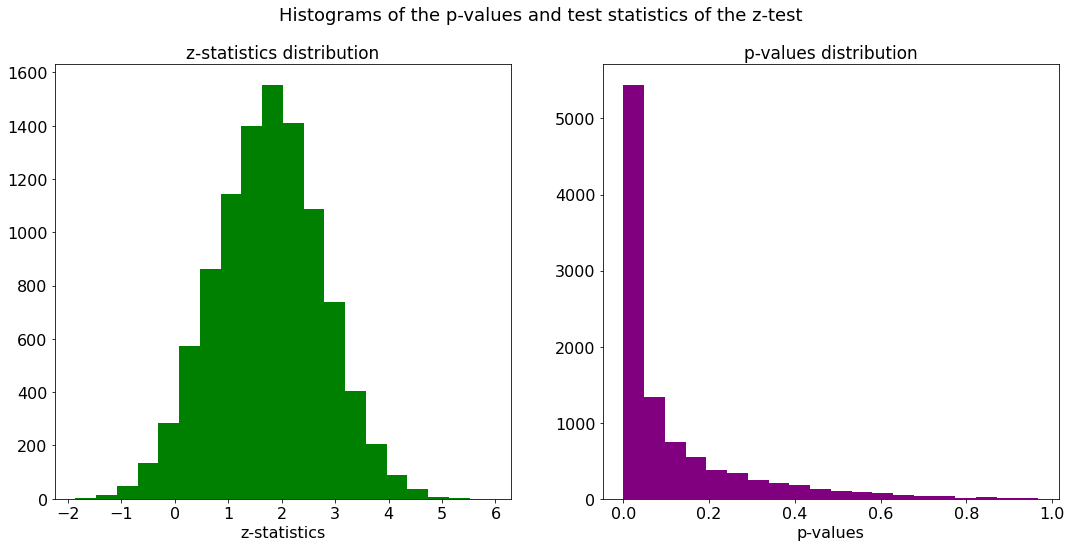

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as sp
from numpy import sqrt

# GENERIC VARIABLES:
n = 3 # Number of radar guns.
variance = 25. # Variance of the error of a single radar gun.
sigma_1 = sqrt(variance)  # Standard deviation of a single reading (to produce the measurement of each radar gun).
sigma_n = sqrt(variance/float(n)) # Standard deviation of the mean of n readings (to compute the z-statistics).
signif = 0.04 # Fixed significance.
v_0 = 40. # Speed of the null hypothesis (in mph). The probability of a type I error is computed when it is true.
v_A = 45. # Speed of any alternative hypothesis (in mph). The power of the test is computed when it is true.
# Comment or uncomment the following two lines to generate cars with speeds verifying the null hypothesis, in
# which v=v_0=40mph (first line), or speeding cars satisfying the simple alternative hypothesis described by
# v=v_A=45mph (second line) [change the value of v_A in the previous line for different alternative hypothesis]:
#v = v_0 # Real speed of a car that verifies the null hypothesis (in mph).
v = v_A # Real speed of a speeding car that verifies the alternative hypothesis (in mph).

# VARIABLES FOR THE SIMULATION:
Ncars = 10000 # Number of times the test will be performed to estimate its power.
Zstat = [] # Initialization of the array containing all the obtained z-statistics for further analysis.
pVals = [] # Initialization of the array containing all the obtained p-Values for further analysis.
# Number of samples in which the null hypothesis is rejected. This quantity divided by Ncars estimates the
# probability of a type I error when the null hypothesis is true (it should be similar to the significance).
# And 1-Nreject/Ncars approximates the probability of a type II error when a given alternative hypothesis
# is true:
Nreject = 0

for j in range(0,Ncars):
    # CREATION OF THE SAMPLE:
    # Random readings of each radar gun, centred around v and with the standard deviation of a single radar gun:
    x_i = sp.norm.rvs(loc=v,scale=sigma_1,size=n)
    X = sum(x_i)/float(n) # Mean of the n readings.
    # PERFORMANCE OF THE STATISTICAL TEST:
    z_obs = (X-v_0)/float(sigma_n) # Observed z-statistics.
    Zstat.append(z_obs) # Saving the new z-statistics.
    # Computation of the p-value (assuming H0 is true, z_obs follows a standard normal distribution):
    pValue = 1-sp.norm.cdf(x=z_obs,loc=0,scale=1)
    pVals.append(pValue) #  Saving the new p-value.
    if pValue<signif:
        Nreject = Nreject+1 # Counts how many times the null hypothesis is rejected in favour of H1.
print(f'From a total simulated set of {Ncars} cars driving at {v}mph, the number of ticketed drivers when \
using {n} radar guns is {Nreject}.')

# Computation of the probabilities of type I or II error depending on what hypothesis is true:
if v==v_0:
    probI = float(Nreject)/float(Ncars)
    print(f'The null hypothesis is true. The probability of rejecting it in favour of an upper 1-sided \
alternative hypothesis is P(type I error)={probI*100:.1f}%. Note the similarity with the chosen significance, \
{signif*100:.1f}%.')
elif v==v_A:
    power = float(Nreject)/float(Ncars)
    probII = 1.-power
    print(f'The null hypothesis is false. The probability of non-rejecting it is \
P(type II error for v={v_A}mph)={probII*100:.1f}%. The power of the test given this alternative hypothesis is \
power(v={v_A}mph)={power*100:.1f}%')


# PLOTTING THE DISTRIBUTION OF THE OBTAINED Z-STATISTICS AND P-VALUES:
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(18,8 ))
ax1.hist(Zstat,bins=20,color='green')
ax1.set_xlabel('z-statistics',fontsize=16)
ax1.set_title('z-statistics distribution',fontsize=17)
ax2.hist(pVals,bins=20,color='purple')
ax2.set_xlabel('p-values',fontsize=16)
ax2.set_title('p-values distribution',fontsize=17)
# Common properties:
plt.suptitle('Histograms of the p-values and test statistics of the z-test',fontsize=18)
for ax in (ax1,ax2,ax3):
    ax.set_ylim(bottom=0.)
    ax.tick_params(axis='both', which='major', labelsize=16)
plt.show()

<div style="text-align: justify"> Using 3 radar guns, the power of the test is around 49%. If we want to know how many radar guns are needed to obtain a power of 90%, we can slightly adapt the previous code to sweep several values of its number (in the same way as we have solved the section e of the exercise 1). This is what the next cell does, giving the result that we need at least 10 radar guns to obtain a power of 90% or more. </div>

In [12]:
# GENERIC VARIABLES:
# Range of number of radar guns scanned:
Nlow = 3
Nhigh = 12
Ncars = 10000 # Number of times the test will be performed for each n to estimate the power.
signif = 0.04 # Fixed significance.
minPower = 0.9 # Required power for the test.
achieved = False # Initialization of the variable containing whether minPower has been reached or not.

# CARS AND RADAR GUNS VARIABLES:
variance = 25. # Variance of the error of a single radar gun.
sigma_1 = sqrt(variance)  # Standard deviation of a single reading (to produce the measurement of each radar gun).
v_0 = 40. # Speed of the null hypothesis (in mph). The probability of a type I error is computed when it is true.
v_A = 45. # Speed of any alternative hypothesis (in mph). The power of the test is computed when it is true.
# Now we are only interested in computing the power, so the alternative hypothesis will always be true:
v = v_A # Real speed of a speeding car that verifies the alternative hypothesis (in mph).

for n in range(Nlow,Nhigh+1):
    sigma_n = sqrt(variance/float(n)) # Standard deviation of the mean of n readings (to compute the z-statistics).
    Nreject = 0 # Number of samples in which the null hypothesis is rejected.
    # SIMULATION OF THE Ncars SPEEDS:
    for j in range(0,Ncars):
        # GENERATION OF THE SAMPLE:
        # Random readings of each radar gun, centred around v and with the standard deviation of a single radar gun:
        x_i = sp.norm.rvs(loc=v,scale=sigma_1,size=n)
        X = sum(x_i)/float(n) # Mean of the n readings.
        # PERFORMANCE OF THE STATISTICAL TEST:
        z_obs = (X-v_0)/float(sigma_n) # Observed z-statistics.
        # Computation of the p-value (assuming H0 is true, z_obs follows a standard normal distribution):
        pValue = 1-sp.norm.cdf(x=z_obs,loc=0,scale=1)
        if pValue<signif:
            Nreject = Nreject+1 # Counts how many times the null hypothesis is rejected in favour of H1.
    # Estimation of the power of the test as the number of rejected null hypothesis (provided that it is false)
    # divided by the total number of performed tests:
    power = float(Nreject)/float(Ncars)
    if power>=minPower:
        minN = n
        achieved = True
        print(f'The minimum number of radar guns required to obtain a power of {minPower*100:.1f}% using v = {v_A}mph \
as alternative hypothesis is {minN}, which leads to a power of {power*100:.1f}%.')
        break
    # If the desired power has not been achieved after the whole loop, the user is advertised:
    if (n==Nhigh)and(achieved==False):
        print(f'The maximum power achieved with n between {Nlow} and {Nhigh} is {power*100:.1f}%. So, it is \
needed to sweep the number of radar guns with a larger interval in order to achieve the required power of \
{minPower*100:.1f}%.')

The minimum number of radar guns required to obtain a power of 90.0% using v = 45.0mph as alternative hypothesis is 10, which leads to a power of 92.7%.


### <div style="text-align: justify"> 5. We generate a number x from a uniform distribution in the interval $[0, \theta]$, and decide to test $H_0 : \theta = 2$ against $H_A : \theta \neq 2$ by rejecting $H_0$ if $x \leq 0.1$ or $x \geq 1.9$. </div>
#### <div style="text-align: justify"> $\;\;$ a) Compute the probability of a type I error. </div>

<div style="text-align: justify"> The fact that $x \sim U[0,\theta]$ implies that its normalized distribution function is $p(x;\theta) = 1/\theta \ \ for \ \ x\in[0,\theta]$ and zero otherwise. </div>

<div style="text-align: justify"> The probability of a type I error is given by the significance, or equivalently, by the probability of rejecting the null hypothesis given that it is true $\alpha \equiv P(type \ I \ error) = P(rejecting \ H_0 | H_0) = P(x \in rejection \ region | H_0)$. In our experiment, given that the null hypothesis is defined with $\theta_0=2$ and the rejection region is $\{x \leq 0.1\} \cup \{x \geq 1.9\}$, </div>
<center> $\alpha = P(\{x \leq 0.1\} \cup \{x \geq 1.9\}|\theta = \theta_0) = \int_{0}^{0.1}{p(x;\theta_0)dx}+\int_{1.9}^{2}{p(x;\theta_0)dx} = \int_{0}^{0.1}{\frac{dx}{\theta_0}}+\int_{1.9}^{2}{\frac{dx}{\theta_0}} = \frac{(0.1-0)+(2-1.9)}{\theta_0} = \frac{0.2}{2} = 0.1$. </center>

<div style="text-align: justify"> The probability of a type I error for the described test is 10%. In consequence, it is not extremely likely, that the null hypothesis is rejected if it is true. The calculation is illustrated in the next plot as two shadowed regions. </div>

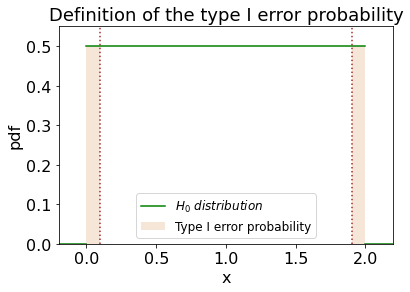

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

# VARIABLES OF THE EXPERIMENT:
theta0 = 2 # For the null hypothesis.
p0 = 1/theta0 # Uniform probability for each value of x inside [0,theta0].
# The rejection region is x_a<=x<=x_b and x_c<=x<=x_d:
x_a = 0.0
x_b = 0.1
x_c = 1.9
x_d = theta0

# PLOTTING THE SKECTH OF THE CALCULUS OF THE TYPE I ERROR PROBABILITY:
fig = plt.subplots()
# Plotting the distribution for the null hypothesis:
x = [0,theta0] # Range of x (it is not needed to use a grid between the limits as the pdf is a constant).
y = [p0 for i in x] # Corresponding values of the probability of x.
plt.plot(x, y, color='green',label='$H_0 \ distribution$')
plt.plot([-0.2,0],[0,0], color='green') # Zero-probability values of the pdf.
plt.plot([theta0,2.2],[0,0], color='green')  # Zero-probability values of the pdf.
# Adding the area of alpha:
x1 = [x_a,x_b]
x2 = [x_c,x_d]
plt.axvline(x_b,color='brown',linestyle='dotted')
plt.axvline(x_c,color='brown',linestyle='dotted')
plt.fill_between(x1, 0,p0, where=None, facecolor='peru', alpha=0.2, label='Type I error probability')
plt.fill_between(x2, 0,p0, where=None, facecolor='peru', alpha=0.2)
# Setting other general properties of the plot:
plt.xlim([-0.2,2.2])
plt.ylim([0,0.55])
plt.title('Definition of the type I error probability',fontsize=18)
plt.xlabel('x',fontsize=16)
plt.ylabel('pdf',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(prop={'size': 12})
plt.show()

#### <div style="text-align: justify"> $\;\;$ b) Compute the probability of a type II error if the true value of $\theta$ is $2.5$. </div>

<div style="text-align: justify"> We want to analyse a measure of the power of this test (in particular, $1-power$) assuming that the real distribution is defined by $\theta_1\equiv2.5$ and maintaining the previous rejection region. The probability of a type II error under these conditions is given by </div>

<center> $P(type \ II \ error) = P(non-rejecting \ H_0 | \theta=\theta_1) =1-P(rejecting \ H_0 | \theta_1) = 1-P(x \in rejection \ region | \theta_1) =$
    $= 1-P(\{x \leq 0.1\} \cup \{x \geq 1.9\}|\theta_1) = P(0.1 \leq x \leq 1.9 | \theta_1) = \int_{0.1}^{1.9}{p(x;\theta_1)dx} = \int_{0.1}^{1.9}{\frac{dx}{\theta_1}} = \frac{1.9-0.1}{\theta_1} = \frac{1.8}{2.5} = 0.72$. </center>

<div style="text-align: justify"> The probability of a type II error for the described test is 72%, which leads to a power of 28%. That is to say, we would reject $H_0$ when it is false only 28% of the times we perform the test. As it has been already said in the previous section, the probability of rejecting $H_0$ in the case it is true is considerably small (10%). However, the probability of non-rejecting it when it is false is very high (72%). This proves that this methodology is not the most appropriate because even if the significance is not very high, the power is very low. </div>

<div style="text-align: justify"> As before, the calculation of this section is graphically shown in the next plot as a shadowed region. </div>

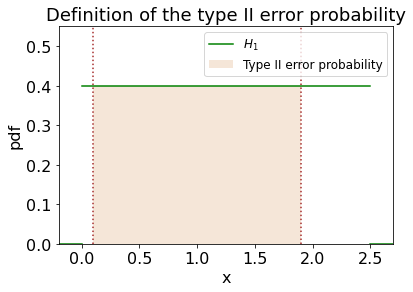

In [14]:
# VARIABLES OF THE EXPERIMENT:
theta1 = 2.5 # For the null hypothesis.
p1 = 1/theta1 # Uniform probability for each value of x inside [0,theta0].
# The integration interval is x_a<=x<=x_b:
x_a = 0.1
x_b = 1.9

# PLOTTING THE SKECTH OF THE CALCULUS OF THE TYPE I ERROR PROBABILITY:
fig = plt.subplots()
# Plotting the true distribution (for theta=2.5):
x = [0,theta1] # Range of x (it is not needed to use a grid between the limits as the pdf is a constant).
y = [p1 for i in x] # Corresponding values of the probability of x.
plt.plot(x, y, color='green',label='$H_1$')
plt.plot([-0.2,0],[0,0], color='green') # Zero-probability values of the pdf.
plt.plot([theta1,2.7],[0,0], color='green')  # Zero-probability values of the pdf.
# Adding the area of the current calculus:
x1 = [x_a,x_b]
plt.axvline(x_a,color='brown',linestyle='dotted')
plt.axvline(x_b,color='brown',linestyle='dotted')
plt.fill_between(x1, 0,p1, where=None, facecolor='peru', alpha=0.2, label='Type II error probability')
# Setting other general properties of the plot:
plt.xlim([-0.2,2.7])
plt.ylim([0,0.55])
plt.title('Definition of the type II error probability',fontsize=18)
plt.xlabel('x',fontsize=16)
plt.ylabel('pdf',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(prop={'size': 12})
plt.show()

### <div style="text-align: justify"> 6. Chi-square for variance: </div>
<H4> <div style="text-align: justify"> The following data comes from a normal distribution which you suspect has variance equal to 1:

<center> {1.76,−2.28,−0.56,1.46,0.59,1.26,−1.94,−0.79,−0.86,−1.41, 2.07, 1.30} </center>

You want to test this against the alternative that the variance is greater than 1.
    
It turns out that there is a chi-square test for this.

See http://www.itl.nist.gov/div898/handbook/eda/section3/eda358.htm, and run the test with significance level 0.05. Give the value of the test statistic and the p-value. </div>

<div style="text-align: justify"> The test statistics of this test is defined as $\small{\underline{T} \equiv (N-1)}\large{\bigg{(}\frac{\underline{\hat{s}}^2}{\sigma_0^2}\bigg{)}}$ where $N$ is the sample size, $\underline{\hat{s}}^2$ is the sample variance and $\sigma_0^2$ is the variance we want to test. In our experiment, $N=12$, $\sigma_0^2=1$ and </div>

<center> $\underline{\hat{s}}^2 \equiv \frac{1}{N-1}\sum_{i=1}^{N}{(\underline{x_i}-\underline{\hat{x}})^2} = \frac{1}{N-1}\sum_{i=1}^{N}{\bigg{(}\underline{x_i}-\frac{1}{N}\sum_{i=1}^{N}{\underline{x_i}}\bigg{)}^2} = 2.34$ </center>

<div style="text-align: justify"> thus, our observed test statistics is: </div>

<center> $\small{T_obs = (12-1)}\frac{2.34}{1} = 25.74$. </center>

<div style="text-align: justify"> If the null hypothesis is true, $\underline{T}$ follows a $\chi^2$ distribution with $\nu=N-1=11$ degrees of freedom. So, $p(\underline{T}=T) = [T/2]^{\normalsize{\nu/2-1}}\normalsize{\frac{e^{-T \ / \ 2}}{2 \ \Gamma(\nu/2)}} = [T/2]^{\normalsize{11/2-1}}\normalsize{\frac{e^{-T \ / \ 2}}{2 \ \Gamma(11/2)}}$.
Once we have the value of the test statistics and how is it distributed assuming $H_0$, we can compute the p-value for an upper 1-sided alternative hypothesis $H_A:\sigma^2>\sigma_0^2$ as: </div>


<center> $p-value = P(\underline{T} \geq T_{obs}|H_0) = 1 - P(\underline{T} \leq T_{obs}|H_0) = 1-\int_{\normalsize{\infty}}^{\normalsize{T_{obs}}}{p(T)dT} \equiv 1-cdf_{\chi^2}(\underline{T}=T_{obs})$ </center>

<div style="text-align: justify"> The numerical value of the obtained p-value is 0.0071, which is much smaller than the significance $\alpha=0.05$. Therefore, we reject the null hypothesis of having a variance equal to 1 in favour of having a variance greater than this value. </div>

<div style="text-align: justify"> All the numerical calculations are made in the following cell of code. </div>

In [15]:
import scipy.stats as sp


data = [1.76,-2.28,-0.56,1.46,0.59,1.26,-1.94,-0.79,-0.86,-1.41,2.07,1.30] # Observed dataset.
sigma0 = 1 # Variance of the null hypothesis (1²=1).

# CALCULATION OF THE STATISTICS OF THE SAMPLE:
N = len(data) # Size of the sample.

# Sample mean:
sample_mean = 0. # Initialization.
for x in data:
    sample_mean = sample_mean + x
sample_mean = sample_mean/N

# Sample variance:
sample_var = 0. # Initialization.
for x in data:
    sample_var = sample_var + (x-sample_mean)**2
sample_var = sample_var/(N-1)

print(f'The given data has {N} elements, sample mean {sample_mean:.2f} and sample variance {sample_var:.2f}.')


# APPLICATION OF THE TEST:
# Calculation of the test statistics:
T_obs = (N-1)*(sample_var/sigma0)
print(f'The test statistics of the given data is {T_obs:.2f}.')
# Calculation of the p-value (df is the variable containing the degrees of freedom):
pValue = 1-sp.chi2.cdf(T_obs,df=(N-1))

print(f'The p-value of the test applied to our data is {pValue*100:.2f}%.')

The given data has 12 elements, sample mean 0.05 and sample variance 2.34.
The test statistics of the given data is 25.74.
The p-value of the test applied to our data is 0.71%.


### <div style="text-align: justify"> 7. Chi-squared for categorical data: </div>
<H4> <div style="text-align: justify"> Ada and Carles spent a fortune on dice and bent coins for their statistics course, so they decide to submit an invoice to the math department for reimbursement. The math department suspects that their six figure expense report is suspicious, so they call you (a physicist) to test the data for fraud. You do some research in Wikipedia and learn that accounting data should follow something called Benford’s law (see 
<a href="https://en.wikipedia.org/wiki/Benford%27s_law">https://en.wikipedia.org/wiki/Benford's_law</a>). This law states that the relative frequency of the first digits of each entry should have the following distribution:

| First digit k | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| probability p(k) | 0.301 | 0.176 | 0.125 | 0.097 | 0.079 | 0.067 | 0.058 | 0.051 | 0.046 |

You go back to the math department and tell them that the only data you need is the counts of all the first digits in their invoice. They are skeptical, but they know you have your own statistics course in FQA and so must know what you are doing. They give you the following counts.

| First digit k | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| count | 7 | 13 | 12 | 9 | 9 | 13 | 11 | 10 | 16 |
    
The math department doesn’t want to unjustly accuse Ada and Carles, so they ask you to test at 0.001 significance level. Run a significance test to see how well this data fits Benford’s distribution and make a recommendation to the math department. </div>

<div style="text-align: justify"> We want to test if counts from the invoice of Ada and Carles follow the distribution described by the Benford's law. First we need to compute the expected frequencies ($exp$) by multiplying the theoretical count of each first digit by the total amount of counts (100 numbers). Second, we check if the observed frequencies ($obs$) are distributed in the same way by using a Pearson $\chi^2$ test. An alternative would be to do a 2-sample Kolmogorov-Smirnov test, but as long as it is principally oriented to continuous distributions, we prefer to be conservative and do not apply it. </div>

<div style="text-align: justify"> The $\chi^2$ test-statistics is defined as $\chi^2 \equiv \sum_{i=1}^N{\normalsize{\frac{(obs_i-exp_i)^2}{exp_i}}}$ and it follows a $\chi^2$ distribution with $9-1=8$ degrees of freedom if the null hypothesis is true. As usual, the null hypothesis is that both sets of frequencies are distributed according the same distribution, while the alternative hypothesis is the opposite. If the p-value obtained from the data is smaller than the specified significance $\alpha=0.001$, the null hypothesis should be rejected in favour of the alternative one and so, the math department might accuse Ada and Carles. </div>

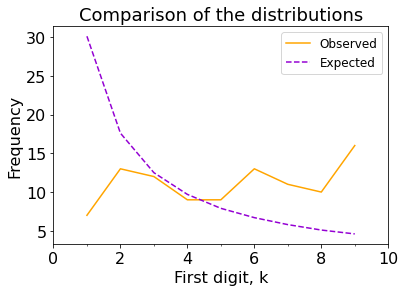

Test statistics: 62.7 ; p-value: 1.37e-10
The p-value of the chi-square test is 1.37e-10, which is smaller than the desired 0.001 significance. Thus, the null hypothesis should be rejected in favour of the alternative hypothesis. The observed distribution of the first digits does not verify the Benford's law.


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import scipy.stats as sp
from numpy import log10 as log

def reject(pVal,significance):
    # This function prints the result of the comparison between the p-value and the significance.
    # It shows if the null hypothesis should be rejected applying the current case.
    if pVal<significance:
        print(f"The p-value of the chi-square test is {pVal:.3}, which is smaller than the desired {significance} \
significance. Thus, the null hypothesis should be rejected in favour of the alternative \
hypothesis. The observed distribution of the first digits does not verify the Benford's law.")
    else:
        print(f"The p-value resulting from a chi-square test is {pVal:.3}, which is larger than the desired \
significance of {significance}. Thus, the null hypothesis should not be rejected in favour of the alternative \
hypothesis. The observed distribution of the first digits verifies the Benford's law.")
    return

# RESULTS AND THEORETICAL EXPECTATION:
k = [1,2,3,4,5,6,7,8,9] # First digits
obs = [7, 13, 12, 9, 9, 13, 11, 10, 16] # Observed counts (frequencies) in Ada and Carles' data.
counts = sum(obs) # Total number of counts in the observed data.
# Comment or uncomment the following lines to use the approximated expected probabilities (first line)
# or the expected probabilities calculated from the analytical distribution (second line):
Blaw = [0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058 , 0.051, 0.046] # Expected probabilities for each k.
#Blaw = [log(1+1/float(k_i)) for k_i in k] # Analytical theoretical probabilities for each k.
exp = [float(x)*float(counts) for x in Blaw] # Expected frequencies for a sample with size 'counts'.

# PLOTTING THE FREQUENCIES OF BOTH DISTRIBUTIONS:
fig, ax = plt.subplots()
plt.plot(k, obs, color='orange',label='Observed')
plt.plot(k, exp, color='darkviolet',label='Expected',linestyle='dashed')
# Setting other general properties of the plot:
plt.xlim([0.,10])
plt.title('Comparison of the distributions',fontsize=18)
plt.xlabel('First digit, k',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.set_minor_locator(MultipleLocator())
plt.legend(prop={'size': 12})
plt.show()

# TEST:
signif = 0.001 # Desired significance.
# Computing the test-statistics and the p-value from the observed and the expected frequencies:
stat, pVal = sp.chisquare(f_obs=obs,f_exp=exp)
print(f'Test statistics: {stat:.1f} ; p-value: {pVal:.3}')
# Comparison between the p-value and the significance with the previously defined function:
reject(pVal,signif)

<div style="text-align: justify"> Before taking any conclusion, it must be considered that the Benford's law will tend to be more accuratly satisfied if: </div>

1. The numbers of Ada and Carles' invoice are random and have no upper or lower limits.

2. These numbers are spread over several orders of magnitude.

3. The total amount of counts (100 in our case) is large enough.

<div style="text-align: justify"> As we do not know the original quantities of the invoice, we need to assume that the second condition is verified. In any case, the larger the range of orders of magnitude covered, better satisfied the Benford's law will be if the null hypothesis is true. </div>

<div style="text-align: justify"> In addition, the applied test is more efficient for large enough sample sizes and frequencies. A typical threshold is set so that observed and expected frequencies should be 5 or more in 80% of the categories. In our case, this is satisfied as there is only one first digit with expected frequency smaller than 5. So, we can rely on the result of the test. </div>

<div style="text-align: justify"> We could have used the probabilities given by the exact distribution function of the Benford's law: $p(k)=\log_{10}(1+1/k)$. However, the result is almost the same as if we use the probabilities given by the exercise. We can check that the test-statistics and the p-value have no relevant changes by running the cell above using the definition of <code>Blaw</code> with the comment <i>'Analytical theoretical probabilities for each k'</i> instead of <i>'Expected probabilities for each k'</i>. </div>

<div style="text-align: justify"> The obtained p-value for the test is several orders of magnitude below the required significance so, in principle the null hypothesis could be rejected at large confidence level. Consequently, if we only analyse frequencies of first digits, the math department might consider that Ada and Carles are not truthful with their invoice as their values do not follow the Benford's law. However, if the math department wants to be even more confident before accusing them, they can investigate the accounting data more in detail. For instance, they could study the distribution of succesive digits and try to know if they are described by the required probabilities as we have done with the first digits. </div>